In [23]:
import pandas as pd
from get_submission import clean_text
from tqdm import tqdm

In [24]:
train = pd.read_csv("train.csv")

In [25]:
train["description"] = train["description"].apply(clean_text)

In [26]:
train["len"] = train["description"].apply(lambda x: len(x.split(" ")))

<AxesSubplot:>

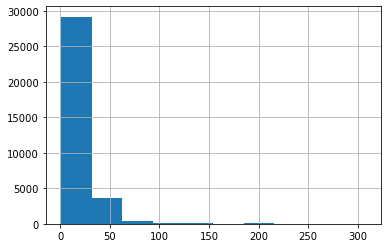

In [27]:
train["len"].hist()

In [28]:
are_equal = []
for _, row in tqdm(train.iterrows(), desc="iterating over rows..."):
    are_equal.append(
        " ".join(row["description"].split(" ")[:3]).lower() == row["name"].lower()  # .split("with")[0].lower()
    )

iterating over rows...: 33613it [00:07, 4697.88it/s]


In [29]:
sum(are_equal)

366

In [9]:
sum(are_equal)

158

In [32]:
train["are_equal"] = are_equal

In [33]:
train.groupby("are_equal")["len"].mean()

are_equal
False    20.922519
True     16.243169
Name: len, dtype: float64

In [51]:
words = [word for text in train[train["are_equal"]]["description"] for word in text.split(" ")[:3]]

In [42]:
#train["are_words"] = [all([len(word) == 3 for word in text[:3].split(" ")]) for text in train["description"]]

In [53]:
are_words = []

for i, row in tqdm(train.iterrows()):
    desc_3_first = row["description"].split(" ")[:3]
    are_words.append(all([len(word)==3 for word in desc_3_first]))

33613it [00:06, 5017.03it/s]


In [49]:
sum(are_words)

33551

In [43]:
train_words = train[train["are_words"]]

In [44]:
train_words.shape

(33551, 5)

In [45]:
train.head()

,name,description,len,are_equal,are_words
0,CROPPED JACKET TRF,Jacket made of a technical fabric with texture...,19,False,True
1,OVERSIZED SHIRT WITH POCKET TRF,Oversized long sleeve shirt with a round colla...,17,False,True
2,TECHNICAL TROUSERS TRF,High-waist trousers with a matching elastic wa...,11,False,True
3,SHIRT DRESS,Collared dress featuring sleeves falling below...,23,False,True
4,PUFF SLEEVE DRESS WITH PLEATS TRF,Loose-fitting midi dress with a round neckline...,28,False,True


In [37]:
train_equal = train[train["are_equal"]].reset_index(drop=True)

In [58]:
train[train["len"] <= 10]["are_equal"].sum()

176

In [68]:
train[train["len"] <= 7].shape[0] / train.shape[0]

0.09645077797280814

In [60]:
176 / 6884

0.02556653108657757

In [61]:
test = pd.read_csv("test.csv")

In [62]:
test["len"] = test["description"].apply(lambda x: len(x.split(" ")))

In [69]:
test[test["len"] <= 7].shape[0] / test.shape[0]

0.13809854267869534

In [70]:
test[test["len"] <= 7]

,description,name,len
17,Bucket hat with band detail.,Bucket hat with band detail.,5
62,Pleated skirt with elastic waistband.,Pleated skirt with elastic waistband.,6
63,Short sleeve T-shirt with a V-neckline.,Short sleeve T-shirt with a V-neckline.,7
64,Short sleeve T-shirt with a V-neckline.,Short sleeve T-shirt with a V-neckline.,7
65,V-neck T-shirt with short sleeves.,V-neck T-shirt with short sleeves.,6
...,...,...,...
1426,Thick linen curtain,Thick linen curtain,3
1427,Melange-effect blanket with fringing.,Melange-effect blanket with fringing.,4
1433,Red fuzzy cushion cover.,Red fuzzy cushion cover.,4
1435,Square cushion featuring an all-over holly print.,Square cushion featuring an all-over holly print.,7


In [72]:
test_are_in_train = test[test["description"].isin(train["description"])]

In [79]:
test_are_in_train.shape

(136, 3)

In [86]:
test[(test["description"].isin(train["description"]))]

,description,name,len
30,Long sleeve T-shirt with a round neckline.,Long sleeve T-shirt with a round neckline.,8
40,"Short dress with a round neckline, puff sleeve...","Short dress with a round neckline, puff sleeve...",24
50,Long sleeve knit sweater with a round neckline...,Long sleeve knit sweater with a round neckline...,12
58,Short sleeve T-shirt with a round neckline.,Short sleeve T-shirt with a round neckline.,8
62,Pleated skirt with elastic waistband.,Pleated skirt with elastic waistband.,6
...,...,...,...
1078,Grey ceramic soap dish.,Grey ceramic soap dish.,4
1079,Grey ceramic jar with lid.,Grey ceramic jar with lid.,5
1080,Grey ceramic dispenser.,Grey ceramic dispenser.,3
1244,Basic plastic placemat with outline. Sold in p...,Basic plastic placemat with outline. Sold in p...,10


In [91]:
train[["Pleated skirt with elastic waistband" in descr for descr in train["description"]]]

,name,description,len,are_equal,are_words
12933,VELVET MINI SKIRT,Pleated skirt with elastic waistband.,6,False,True
20548,ACCORDION PLEAT SKIRT,"Pleated skirt with elastic waistband and bow, ...",17,False,True


In [109]:
train_in_test = train[train["description"].isin(test["description"])].drop_duplicates(subset=["description"]).reset_index(drop=True)

In [126]:
select_names = {}
for i, row in tqdm(train_in_test.iterrows()):
    test_row = test[test["description"] == row["description"]]
    select_names[test_row.index.values[0]]={"description": test_row["description"].values[0], "name": row["name"]}
    

133it [00:00, 541.67it/s]


In [127]:
select_names

{100: {'description': 'Round neck sweater with long sleeves. ',
  'name': 'RIBBED KNIT SWEATER'},
 133: {'description': 'Short sleeve T-shirt with a round neckline and a contrast front print. ',
  'name': 'STRIPED FLORAL T-SHIRT'},
 71: {'description': 'Halter neck bodysuit with snap-button fastening at the bottom. ',
  'name': 'HALTERNECK BODYSUIT'},
 30: {'description': 'Long sleeve T-shirt with a round neckline. ',
  'name': 'STRIPED COTTON T-SHIRT'},
 63: {'description': 'Short sleeve T-shirt with a V-neckline. ',
  'name': 'BASIC LYOCELL T-SHIRT'},
 65: {'description': 'V-neck T-shirt with short sleeves. ',
  'name': 'BASIC V-NECK T-SHIRT TRF'},
 124: {'description': 'High waist trousers with front pockets and false rear jetted pockets. Featuring a belt in the same fabric with a covered buckle and fastening with metal hook, inside button and zip. ',
  'name': 'BELTED TROUSERS'},
 58: {'description': 'Short sleeve T-shirt with a round neckline. ',
  'name': 'COLOURED TEXTURED T-SHI

In [121]:
indexes = [dic["idx"] for dic in select_names]

In [118]:
import csv
def _read_subm_file(file):
    submission = []
    with open(file, "r") as f:
        reader = csv.reader(f)
        for line in reader:
            submission.append(line)
    submission = submission[1:]
    return submission

In [120]:
submission = _read_subm_file("submission_especial3103.csv")

In [128]:
for idx in tqdm(indexes):
    if select_names[idx]["name"] not in submission[idx]:
        submission[idx] = [select_names[idx]["name"]] + submission[:9]

100%|██████████| 133/133 [00:00<00:00, 32273.21it/s]


In [129]:
di = {f"pred_{i}": [] for i in range(10)}
for names in submission:
    if len(names) != 10:
        print(names)
        print(len(names))
        break
    for i in range(len(names)):
        di[f"pred_{i}"].append(names[i])

In [130]:
df = pd.DataFrame(di)

In [131]:
df.to_csv("submission_turbia.csv", header=False, index=False)

In [92]:
select_names = []

for i, row in tqdm(test.iterrows()):
    row_text = row["description"]
    train_are = train[[row_text in descr for descr in train["description"]]].copy()
    if train_are.shape[0] > 1:
        #select_names.append()
        train_are["perc_"] = [sum([word in text.split(" ") for word in row_text.split(" ")])/len(text.split(" ")) for text in train_are["description"]]
        select_names.append(train_are.sort_values(by="perc_", ascending=False).reset_index().loc[0, "name"])


27it [00:01, 24.89it/s]/home/alejandro.vaca/miniconda/envs/spainai_hackaton/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
1441it [00:46, 31.31it/s]


['STRIPED T-SHIRT',
 'ADJUSTABLE-HEM T-SHIRT',
 'STRIPED KNIT SWEATER',
 'FADED-EFFECT T-SHIRT',
 'RIBBED T-SHIRT TRF',
 'BASIC LYOCELL T-SHIRT',
 'BASIC LYOCELL T-SHIRT',
 'BASIC V-NECK T-SHIRT TRF',
 'RIBBED T-SHIRT TRF',
 'HALTERNECK BODYSUIT',
 'RIBBED KNIT SWEATER',
 'STRIPED FLORAL T-SHIRT',
 'Golden Tablespoon',
 'Golden Tablespoon',
 'MARBLE-EFFECT PORCELAIN SIDE PLATE',
 'SET OF 6 COLOUR BOROSILICATE GLASS STRAWS']